In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/partidos_cebollitas.csv')
df.head(9)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML
5,2023-02-05,Data United,Cebollitas FC,3,3,60,40,8,11,Python Arena
6,2023-02-12,Data United,Real Pandas,4,1,49,51,4,8,Estadio ML
7,2023-02-19,Cebollitas FC,Real Pandas,1,2,56,44,5,5,Estadio ML
8,2023-02-26,NumPy City,Data United,1,5,60,40,9,9,Estadio DataCamp


In [6]:
df.describe()

,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.63000,2.540000,50.250000,49.750000,7.580000,7.870000
std,1.58691,1.788967,6.035878,6.035878,2.899599,2.966667
min,0.00000,0.000000,40.000000,40.000000,3.000000,3.000000
25%,1.00000,1.000000,45.000000,44.750000,5.000000,5.000000
50%,3.00000,3.000000,51.000000,49.000000,7.500000,8.000000
75%,4.00000,4.000000,55.250000,55.000000,10.000000,11.000000
max,5.00000,5.000000,60.000000,60.000000,12.000000,12.000000


In [7]:
home_wins = df[df['equipo_local'] == 'Cebollitas FC']['goles_local'].mean()
away_wins = df[df['equipo_visitante'] == 'Cebollitas FC']['goles_visitante'].mean()

print(f"Average home goals: {home_wins}")
print(f"Average away goals: {away_wins}")

Average home goals: 2.230769230769231
Average away goals: 2.611111111111111


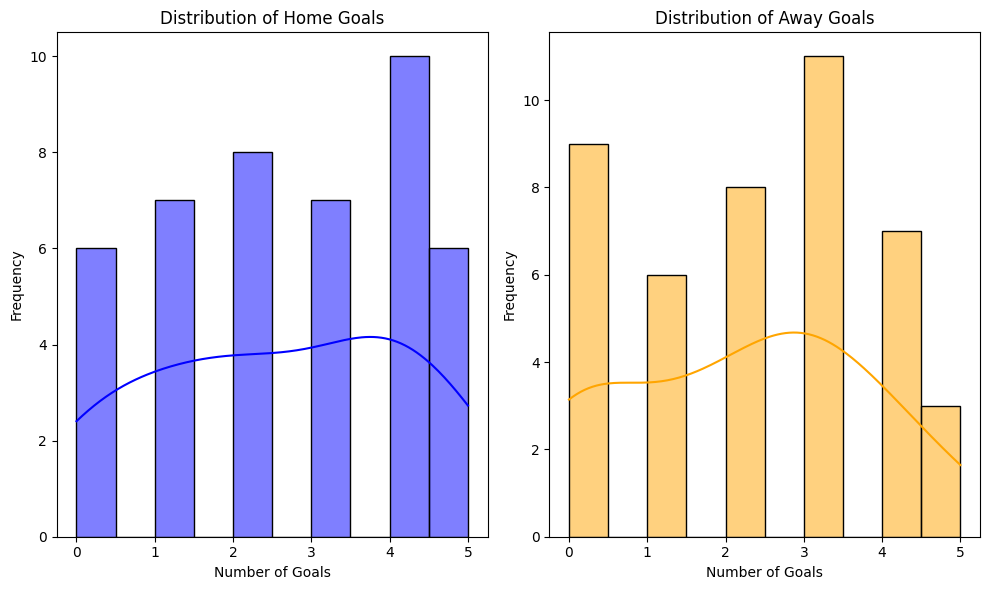

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

df_cebollitas = df[(df['equipo_local'] == 'Cebollitas FC') | (df['equipo_visitante'] == 'Cebollitas FC')]

sns.histplot(df_cebollitas['goles_local'], bins=10, kde=True, ax=ax[0], color='blue')
ax[0].set_title('Distribution of Home Goals')
ax[0].set_xlabel('Number of Goals')
ax[0].set_ylabel('Frequency')
sns.histplot(df_cebollitas['goles_visitante'], bins=10, kde=True, ax=ax[1], color='orange')
ax[1].set_title('Distribution of Away Goals')
ax[1].set_xlabel('Number of Goals')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

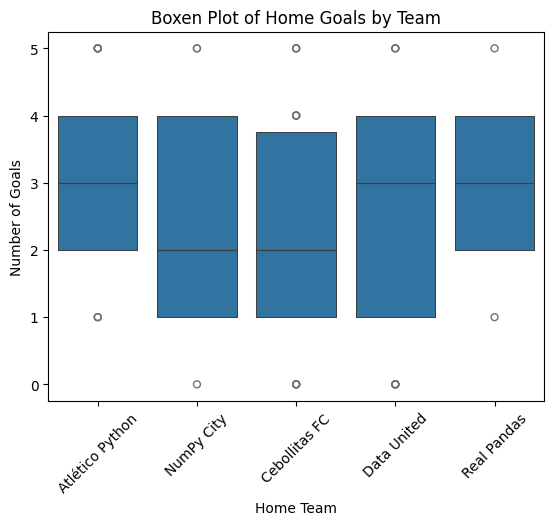

In [19]:
sns.boxenplot(x='equipo_local', y='goles_local', data=df)
plt.title('Boxen Plot of Home Goals by Team')
plt.xlabel('Home Team')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)
plt.show()

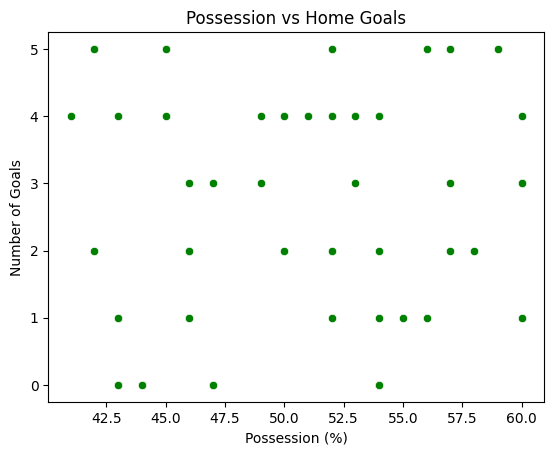

In [22]:
sns.scatterplot(x='posesion_local (%)', y='goles_local', data=df_cebollitas, color='green')
plt.title('Possession vs Home Goals')
plt.xlabel('Possession (%)')
plt.ylabel('Number of Goals')
plt.show()

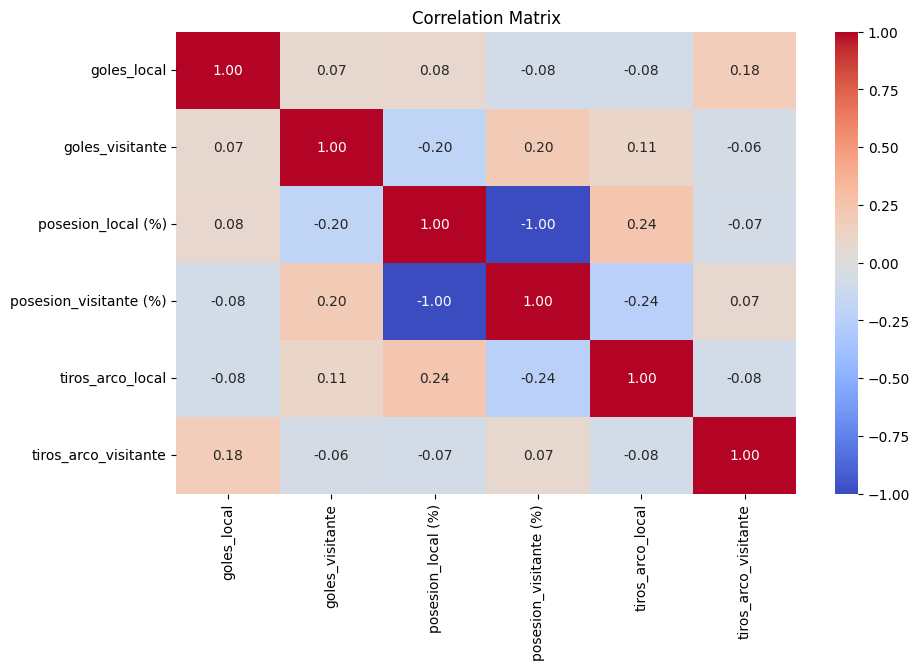

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cebollitas[['goles_local', 'goles_visitante', 'posesion_local (%)', 
                         'posesion_visitante (%)', 'tiros_arco_local', 
                         'tiros_arco_visitante']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()